## Cellphone Data Analysis and Price Prediction

This project focuses on analyzing smartphone specifications and predicting their prices using machine learning techniques. The dataset is sourced from Kaggle and contains key hardware and feature-level attributes of mobile phones.

### Dataset
**Source:** Kaggle  
**Link:** https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction  

The dataset includes the following features:
- Price (target variable)
- Sale
- Weight
- Screen Resolution (in inches)
- PPI (Pixel Density)
- CPU Cores
- CPU Frequency (GHz)
- Internal Memory (GB)
- RAM (GB)
- Rear Camera (MP)
- Front Camera (MP)
- Battery Capacity (mAh)
- Thickness (mm)

### Approach
- Data cleaning and preprocessing
- Feature scaling (standardization)
- Exploratory Data Analysis (EDA)
- Outlier handling
- Linear Regression model for price prediction using simple python


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [145]:
data = pd.read_csv('../Data/Cellphone.csv')

In [146]:
data.head() 

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [147]:
data.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

`Dataset have not null value`

In [148]:
data = data.drop(columns=['Product_id'])

In [149]:
data.shape

(161, 13)

`There are total 161 rows and 13 columns`

In [150]:
data.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


- **Notable observations:**
  - The **price range** spans from **614 to 4361**, with most smartphones concentrated around **2000**.
  - **Screen resolution** values are primarily clustered between **4.5 and 5.2 inches**.
  - The majority of **PPI** values fall within the range of **230 to 300**.
  - **Internal memory** shows high variation, indicating a wide range of storage capacities.
  - **Battery capacity** is mostly distributed between **2000 and 3500 mAh**.
  - **Thickness** values largely lie between **7.6 and 9.8 mm**, suggesting relatively consistent device profiles.

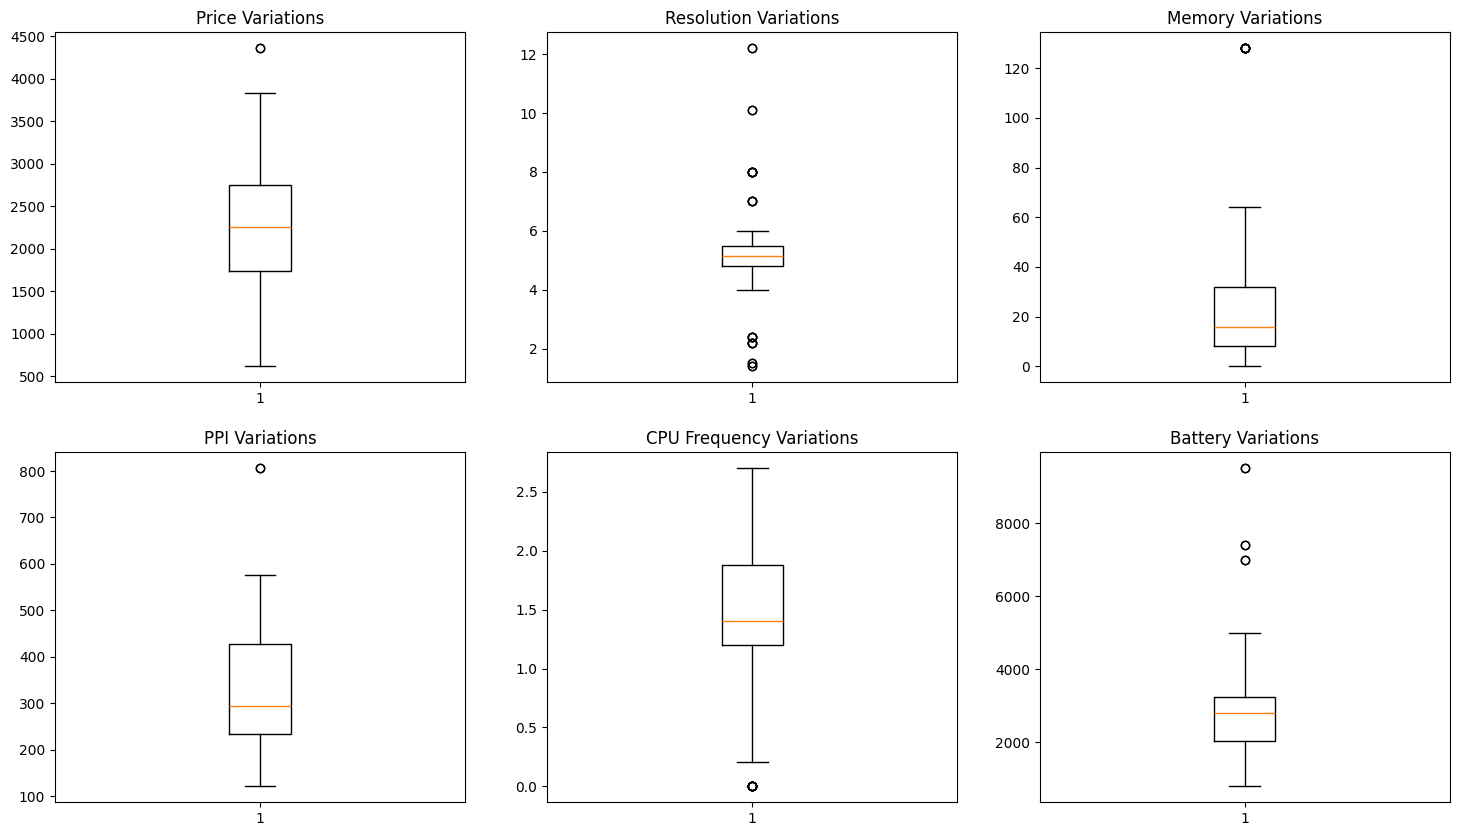

In [151]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs[0, 0].boxplot(data['Price'])
axs[0, 0].set_title('Price Variations')

axs[0, 1].boxplot(data['resoloution'])
axs[0, 1].set_title('Resolution Variations')

axs[0, 2].boxplot(data['internal mem'])
axs[0, 2].set_title('Memory Variations')

axs[1, 0].boxplot(data['ppi'])
axs[1, 0].set_title('PPI Variations')

axs[1, 1].boxplot(data['cpu freq'])
axs[1, 1].set_title('CPU Frequency Variations')

axs[1, 2].boxplot(data['battery'])
axs[1, 2].set_title('Battery Variations')

plt.show()


### This visualization shows that  
- **Resolution exhibits significant variation across the dataset**, indicating a wide range of screen sizes used in different cellphones.


In [152]:
data.columns

Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

[]

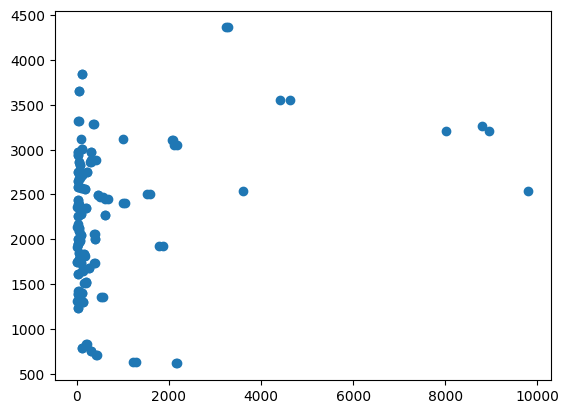

In [153]:
plt.scatter(data['Sale'],data['Price'])
plt.plot()

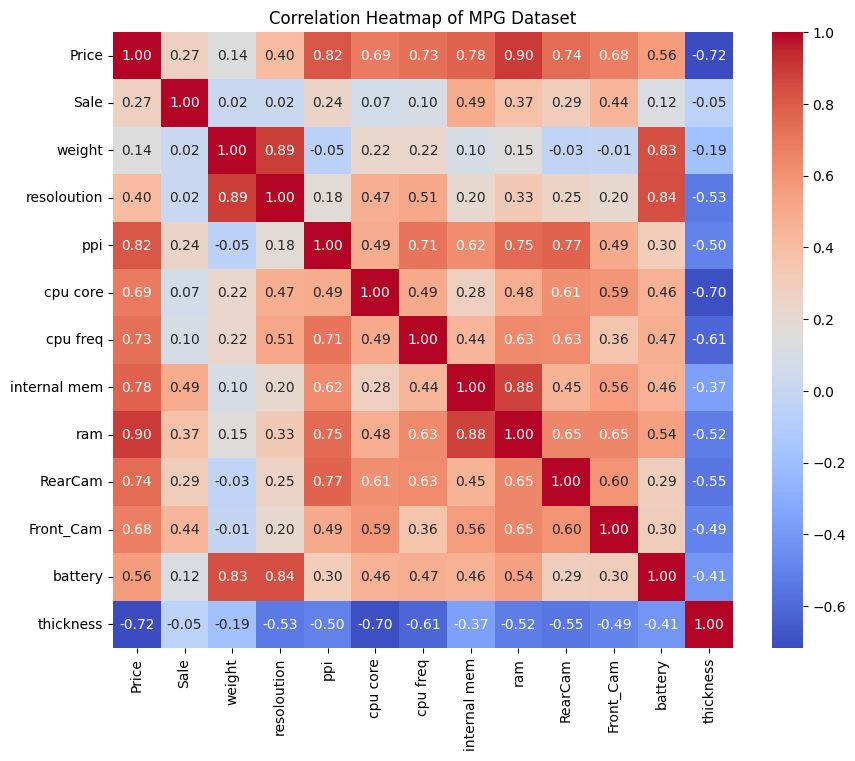

In [154]:
correlation_matrix = data.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8)) 
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of MPG Dataset')
plt.show()

- **Correlation insights:**
  - The **strongest correlation with price** is observed for **RAM (~90%)**.
  - This is followed by **PPI (~0.82)**, indicating a strong relationship between display quality and price.
  - **Internal memory (~78%)** also shows a significant positive correlation with price.
  - **CPU frequency** has a moderate correlation, contributing to price variation.
  - **Rear camera resolution** shows a noticeable but comparatively weaker correlation with price.


In [155]:
# Takking good correlated and more usefull data 
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

features = [
     'resoloution', 'ppi',
    'cpu_core', 'cpu_freq', 'internal_mem',
    'ram', 'rearcam', 'front_cam',
    'battery'
]

feature_mean = {}
feature_std = {}

for col in features:
    feature_mean[col] = data[col].mean()
    feature_std[col] = data[col].std()
    data[col] = (data[col] - feature_mean[col]) / feature_std[col]



In [156]:
price_mean = data['price'].mean()
price_std = data['price'].std()

data['price'] = (data['price'] - price_mean) / price_std


In [157]:
# Outliear remove process
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |
                    (data > (Q3 + 1.5 * IQR))).any(axis=1)]


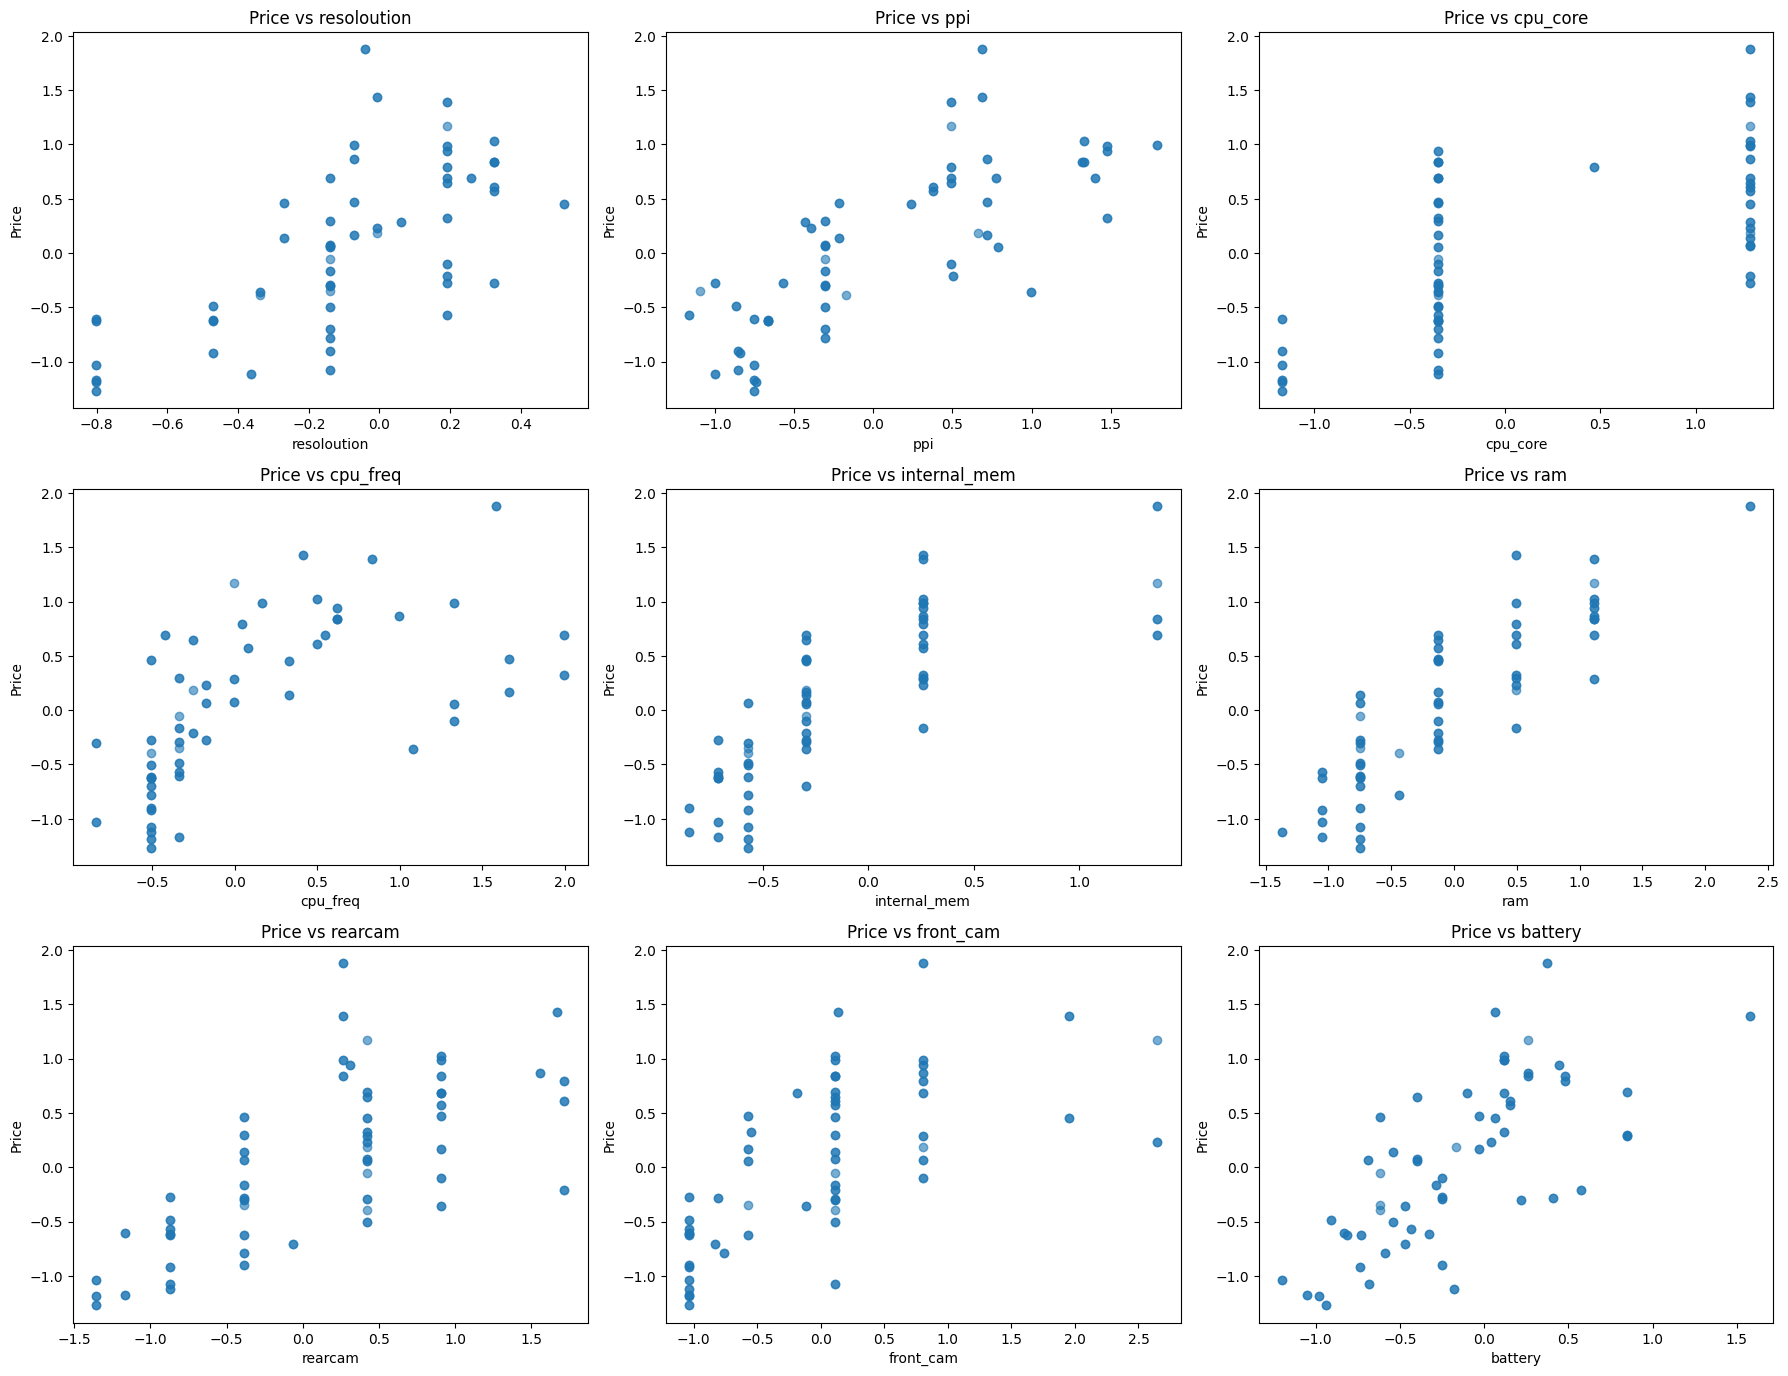

In [158]:
fig, axs = plt.subplots(4, 3, figsize=(18, 18))
axs = axs.flatten()   

for i, col in enumerate(features):
    axs[i].scatter(data[col], data['price'], alpha=0.6)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'Price vs {col}')

for j in range(len(features), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


- Although some of the above features may appear as categorical or discrete in nature, they are treated as numerical variables and effectively used to predict the cellphone price with good accuracy.


# Cellphone Data Analysis

## Key Factors Affecting Price
1. **RAM** – Higher RAM generally leads to higher phone prices.  
2. **CPU Frequency** – Faster processors increase the cost.  
3. **Rear Camera** – Better camera resolution drives the price up.  
4. **Battery** – Larger battery capacity slightly increases the price.  
5. **Internal Memory** – More storage contributes to higher pricing.  
6. **Screen Resolution & PPI** – High-quality displays increase price.

## Factors for Cheaper Phones
- Phones with **lower RAM**, **lower PPI**, and **smaller rear cameras** tend to be cheaper.  
- Internal memory and battery size can also be optimized to reduce cost.

## Sales vs Price Relationship
- There is **no fixed correlation** between sales and price.  
- Some high-priced phones may sell less, while some moderately priced phones sell more.  
- Improving hardware quality (RAM, CPU, camera) usually increases price but may not directly influence sales.

## Recommendations for Phone Companies
- Focus on **efficient RAM and CPU optimization** for better performance.  
- Balance **display quality and camera features** with price to target different customer segments.  
- Consider affordable phones by **reducing RAM, screen PPI, and storage**, lowering cost while maintaining usability.


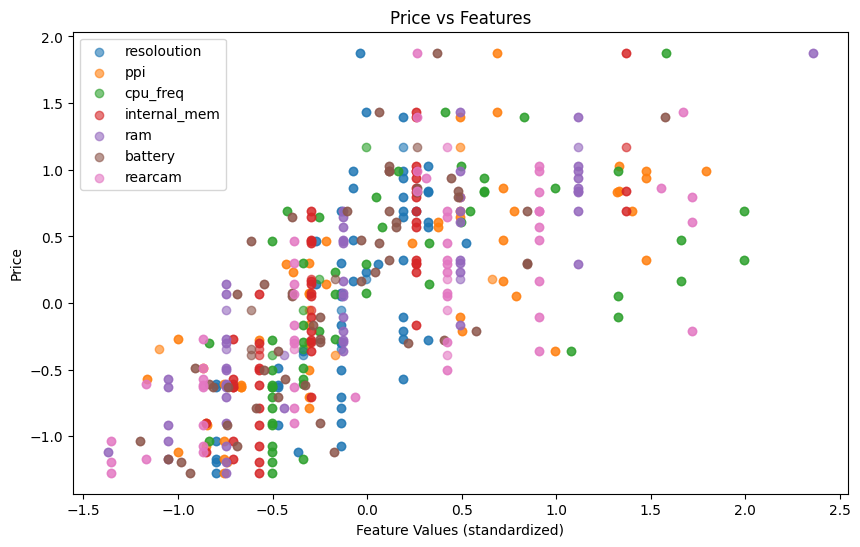

In [159]:
features = [ 'resoloution', 'ppi', 'cpu_freq', 'internal_mem','ram','battery','rearcam']
plt.figure(figsize=(10, 6))

for col in features:
    plt.scatter(data[col], data['price'], label=col, alpha=0.6)

plt.xlabel('Feature Values (standardized)')
plt.ylabel('Price')
plt.title('Price vs Features')
plt.legend()
plt.show()


In [160]:

def model(x_feature, slope,bias,size):
    y_pridicted = 0
    for i in range(size):
        y_pridicted = (x_feature[i]*slope[i]) +y_pridicted
    y_pridicted = y_pridicted + bias
    return y_pridicted
def loss(y_pridicted , y_actual):
    loss = float((y_actual - y_pridicted)**2)
    return loss
def wrtSlope(x_actual,y_actual,y_pridicted):
    dslope = float(-2*(x_actual)*(y_actual - y_pridicted))
    return dslope
def wrtBias(y_actual,y_pridicted):
    dBias = float(-2*(y_actual - y_pridicted))
    return dBias

In [161]:
data.columns

Index(['price', 'sale', 'weight', 'resoloution', 'ppi', 'cpu_core', 'cpu_freq',
       'internal_mem', 'ram', 'rearcam', 'front_cam', 'battery', 'thickness'],
      dtype='object')

In [162]:
lr = 0.0011
w_resol = 0
w_ppi = 0
w_cpu_freq = 0
w_internal_mem = 0
w_ram = 0
w_battery = 0
w_rearcam = 0
ss_res = 0
ss_tot = 0
y_mean = data['price'].mean()
rmse =0
bias = 0
for j in range (1000):
    sq_error_sum = 0
    for i in range(data['price'].size):
        
        # finding the perticular location
        y_actual = data['price'].iloc[i]    
        x_actual_resol = data['resoloution'].iloc[i]
        x_actual_ppi = data['ppi'].iloc[i]
        x_actual_cpu_freq = data['cpu_freq'].iloc[i]
        x_actual_internal_mem  =  data['internal_mem'].iloc[i]
        x_actual_ram = data['ram'].iloc[i]
        x_actual_battery = data['battery'].iloc[i]
        x_actual_rearCam = data['rearcam'].iloc[i]
        
        # weight and input values
        w = [w_resol, w_ram, w_internal_mem, w_ppi, w_cpu_freq, w_battery, w_rearcam]
        x = [x_actual_resol, x_actual_ram, x_actual_internal_mem,x_actual_ppi, x_actual_cpu_freq, x_actual_battery, x_actual_rearCam]

        # pridict the value from the model 
        y_pridicted = model(x_feature=x,slope=w,bias=bias,size=7)
        
        
        # adjusting the slope
        w_resol = w_resol-lr*wrtSlope(x_actual_resol,y_actual,y_pridicted)
        w_ppi = w_ppi-lr*wrtSlope(x_actual_ppi,y_actual,y_pridicted)
        w_cpu_freq = w_cpu_freq-lr*wrtSlope(x_actual_cpu_freq,y_actual,y_pridicted)
        w_internal_mem = w_internal_mem - lr*wrtSlope(x_actual_internal_mem,y_actual,y_pridicted)
        w_ram = w_ram - lr*wrtSlope(x_actual_ram,y_actual,y_pridicted)
        w_battery = w_battery - lr*wrtSlope(x_actual_battery,y_actual,y_pridicted)
        w_rearcam = w_rearcam - lr*wrtSlope(x_actual_rearCam,y_actual,y_pridicted)
        # bias adjustments
        bias = bias - lr*wrtBias(y_actual , y_pridicted)
        
        # finding the score 
        sq_error_sum += loss(y_pridicted,y_actual)
        ss_res += (y_actual - y_pridicted) ** 2
        ss_tot += (y_actual - y_mean) ** 2
    
    # rmse calculating
    rmse = np.sqrt(sq_error_sum / data['price'].size)


In [163]:
r2 = 1 - (ss_res / ss_tot)
print("R2 =", r2)

print("RMSE = ",rmse)

R2 = 0.817228785123339
RMSE =  0.3206259132634493


## Price Prediction Model Performance

- **R² (Coefficient of Determination):** 0.810  
  The model explains approximately 81% of the variance in price.

- **RMSE (Root Mean Squared Error):** 0.327  
  On average, the model's predictions deviate from actual prices by 0.327 units.

**Conclusion:**  
The model is about **80% accurate** in predicting prices, showing good predictive performance.


In [164]:
new_input= {
    'resoloution': 4,
    'ppi': 233,
    'cpu_core': 2,
    'cpu_freq': 1.3,
    'internal_mem': 4,
    'ram': 0.512,
    'rearcam': 3.12,
    'front_cam': 0,
    'battery': 1400
}

new_input_std = {}

for col in new_input:
    new_input_std[col] = (
        new_input[col] - feature_mean[col]
    ) / feature_std[col]

predicted_price = (
    w_ram * new_input_std['ram'] +
    w_cpu_freq * new_input_std['cpu_freq'] +
    w_resol * new_input_std['resoloution'] +
    w_internal_mem * new_input_std['internal_mem'] +
    w_ppi * new_input_std['ppi'] +
    w_battery * new_input_std['battery'] +
    bias
)
predicted_price = predicted_price * price_std + price_mean

print("Predicted Price:", f"{predicted_price:.2f} ₹")


Predicted Price: 1568.35 ₹


In [165]:
X = data[features]
y = data['price']

In [166]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [167]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.8200640225945127
RMSE: 0.3192163322015598


In [168]:
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.3f}")


resoloution: 0.281
ppi: 0.176
cpu_freq: -0.010
internal_mem: 0.140
ram: 0.435
battery: 0.033
rearcam: 0.130


`Both Custom pipline and sklearn model have almost same r2 value and diffrence`